In [15]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Plot 1: Load and plot original point_index CSV file**

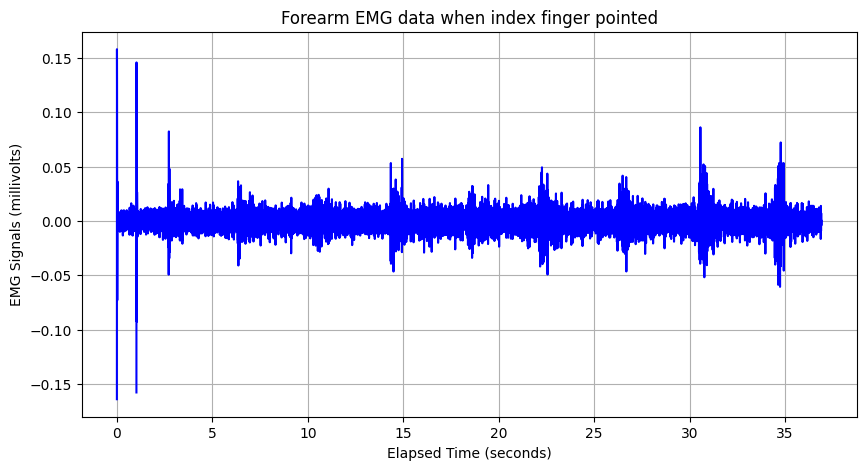

In [16]:
# Load the CSV file
file_path = "point_index.csv"
df = pd.read_csv(file_path)

# Convert elapsed time to numerical format (seconds)
df['Elapsed Time'] = pd.to_timedelta(df['Elapsed Time']).dt.total_seconds()

# Plot Channel 1 data
plt.figure(figsize=(10, 5))
plt.plot(df['Elapsed Time'], df['Ch1'], color='b')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('EMG Signals (millivolts)')
plt.title('Forearm EMG data when index finger pointed')
plt.grid(True)
plt.show()

**Plot 2: Start at 13 seconds to remove outliers and calibration period**

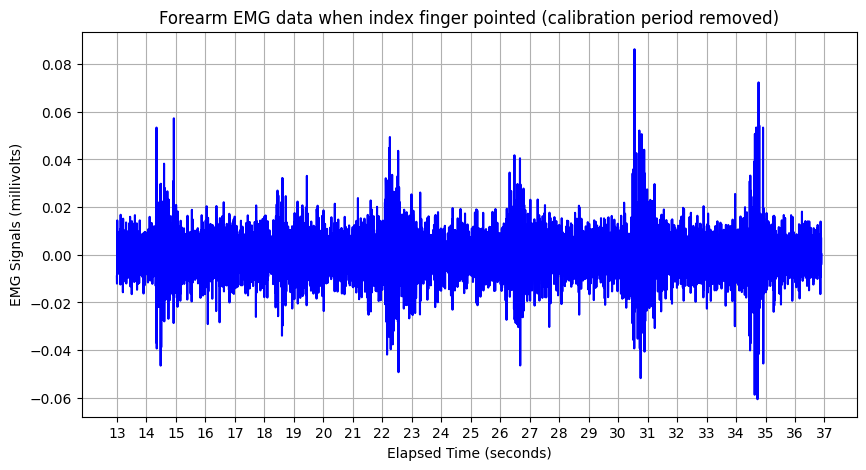

In [17]:
# Remove data before 13 seconds
df_filtered = df[df['Elapsed Time'] > 13]

# Plot the filtered Channel 1 data with x-axis labeled for every second
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Elapsed Time'], df_filtered['Ch1'], color='b')

# Set x-axis labels for every second
plt.xticks(np.arange(df_filtered['Elapsed Time'].min(), df_filtered['Elapsed Time'].max()+1, 1))

plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('EMG Signals (millivolts)')
plt.title('Forearm EMG data when index finger pointed (calibration period removed)')
plt.grid(True)
plt.show()

**Plot 3: Remove noisy data between finger movements**

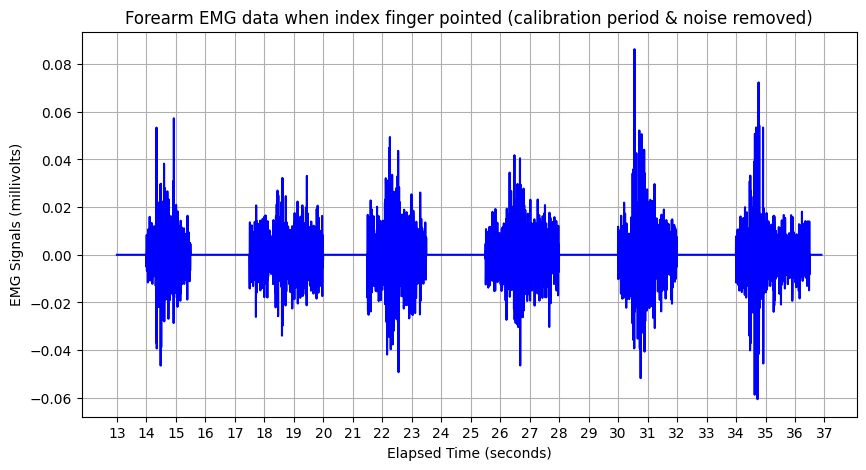

In [18]:
# Apply the mask to set values to 0 in the specified time ranges
mask = (df['Elapsed Time'] < 14) | \
       ((df['Elapsed Time'] >= 15.5) & (df['Elapsed Time'] <= 17.5)) | \
       ((df['Elapsed Time'] >= 20) & (df['Elapsed Time'] <= 21.5)) | \
       ((df['Elapsed Time'] >= 23.5) & (df['Elapsed Time'] <= 25.5)) | \
       ((df['Elapsed Time'] >= 28) & (df['Elapsed Time'] <= 30)) | \
       ((df['Elapsed Time'] >= 32) & (df['Elapsed Time'] <= 34)) | \
       (df['Elapsed Time'] >= 36.5)

df.loc[mask, 'Ch1'] = 0

# Filter to start at 13 seconds
df_filtered = df[df['Elapsed Time'] > 13]

# Plot the modified Channel 1 data starting from 13 seconds
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Elapsed Time'], df_filtered['Ch1'], color='b')

# Set x-axis labels for every second
plt.xticks(np.arange(df_filtered['Elapsed Time'].min(), df_filtered['Elapsed Time'].max()+1, 1))

plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('EMG Signals (millivolts)')
plt.title('Forearm EMG data when index finger pointed (calibration period & noise removed)')
plt.grid(True)
plt.show()